**CODEALPHA TASK 2: CAR PRICE PREDICTION**

**Student ID: CA/DF1/22584**

**Name: Sunit Modak**

In [34]:
# Importing All Essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
# Replace 'cars.csv' with your dataset path
df = pd.read_csv('car data.csv')

In [36]:
# Preview data
print(df.head())
print(df.info())
print(df.describe())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [37]:
df = df.dropna()  # simplest approach
# Or fill with mean/median for numerical columns
# df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


In [38]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

# Column Transformer for pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [39]:
X = df[numerical_features + categorical_features]
y = df['Selling_Price']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression RMSE: 1.87
Linear Regression R² Score: 0.85
------------------------------
Random Forest RMSE: 0.91
Random Forest R² Score: 0.96
------------------------------


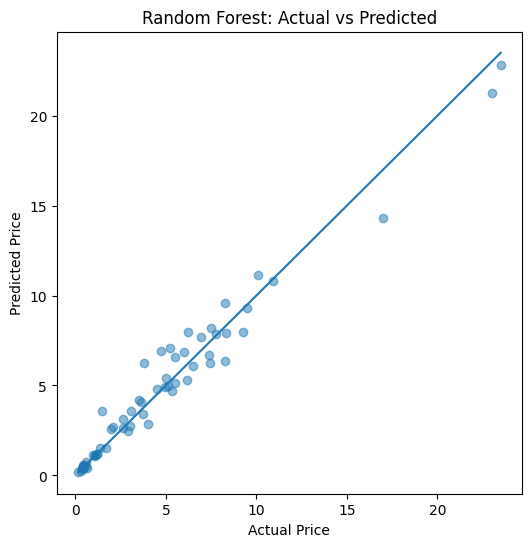

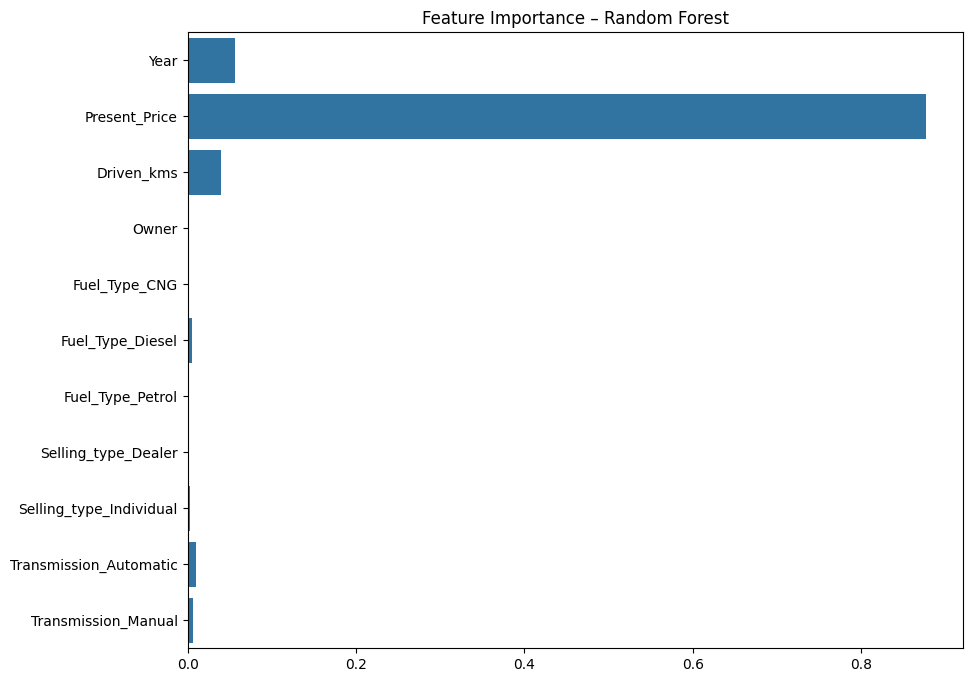

In [40]:
# ===============================
# Model Evaluation
# ===============================

# Random Forest Pipeline (Added for fix)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R² Score: {r2:.2f}")
    print("-" * 30)

# --- Evaluate models safely ---
if 'y_pred_lr' in globals():
    evaluate(y_test, y_pred_lr, "Linear Regression")
else:
    print("Linear Regression predictions not found. Skipping LR evaluation.")

evaluate(y_test, y_pred_rf, "Random Forest")

# ===============================
# Predicted vs Actual Plot
# ===============================
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.show()

# ===============================
# Feature Importance (Random Forest)
# ===============================
num_features = rf_pipeline.named_steps["preprocessor"] \
    .transformers_[0][2]

cat_features = rf_pipeline.named_steps["preprocessor"] \
    .transformers_[1][1] \
    .get_feature_names_out(
        rf_pipeline.named_steps["preprocessor"].transformers_[1][2]
    )

feature_names = list(num_features) + list(cat_features)

importances = rf_pipeline.named_steps["regressor"].feature_importances_

plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance – Random Forest")
plt.show()

In [41]:
# Linear Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [42]:
# Linear Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


Linear Regression RMSE: 1.87
Linear Regression R^2 Score: 0.85
Random Forest RMSE: 0.91
Random Forest R^2 Score: 0.96


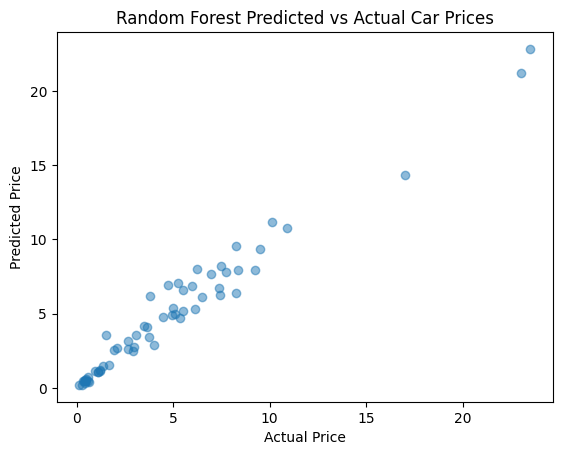

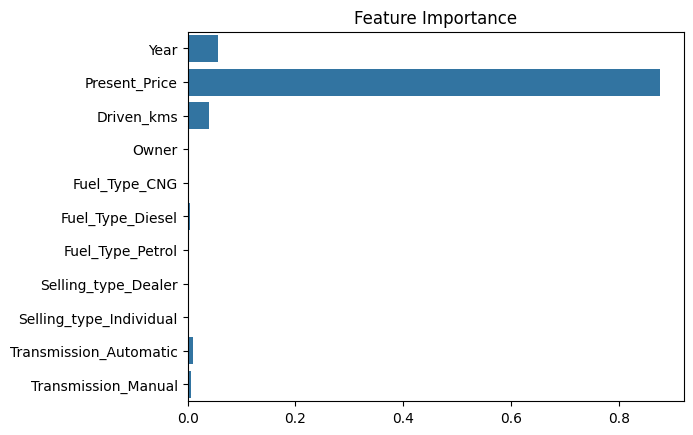

In [43]:
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} RMSE: {rmse:.2f}')
    print(f'{model_name} R^2 Score: {r2:.2f}')

evaluate(y_test, y_pred_lr, 'Linear Regression')
evaluate(y_test, y_pred_rf, 'Random Forest')
# Predicted vs Actual Prices
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Predicted vs Actual Car Prices')
plt.show()

# Feature Importance for Random Forest
importances = rf_pipeline.named_steps['regressor'].feature_importances_
feature_names = rf_pipeline.named_steps['preprocessor'].transformers_[0][2] + \
                list(rf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()


In [44]:
import pandas as pd

# ---------- SAFE INPUT FUNCTIONS ----------
def safe_int(prompt):
    while True:
        try:
            return int(input(prompt).strip())
        except ValueError:
            print("❌ Enter a valid INTEGER value.")

def safe_float(prompt):
    while True:
        try:
            return float(input(prompt).strip())
        except ValueError:
            print("❌ Enter a valid NUMBER (use decimal point, not comma).")

# ---------- USER INPUT ----------
print("\n--- 🚗 Interactive Car Price Prediction 🚗 ---")
Year = safe_int("Year Bought (e.g., 2015): ")
Present_Price = safe_float("Showroom Price (in lakhs, e.g., 5.59): ")
Kms_Driven = safe_int("Kilometers Driven (e.g., 27000): ")
Owner = safe_int("Number of Previous Owners (0, 1, 2...): ")

Fuel_Type = input("Fuel Type (Petrol/Diesel/CNG): ").strip().capitalize()
if Fuel_Type == "Cng": Fuel_Type = "CNG" # Fix casing for CNG

Seller_Type = input("Seller Type (Dealer/Individual): ").strip().capitalize()
Transmission = input("Transmission (Manual/Automatic): ").strip().capitalize()

# ---------- PREDICTION LOGIC ----------
# 1. Create DataFrame with the EXACT column names from training
input_data = pd.DataFrame({
    'Year': [Year],
    'Present_Price': [Present_Price],
    'Driven_kms': [Kms_Driven],       # <--- FIXED NAME
    'Fuel_Type': [Fuel_Type],
    'Selling_type': [Seller_Type],    # <--- FIXED NAME
    'Transmission': [Transmission],
    'Owner': [Owner]
})

print("\nProcessing input...")

# 2. Predict
try:
    prediction = rf_pipeline.predict(input_data)
    print(f"\n💰 Estimated Selling Price: ₹{prediction[0]:.2f} Lakhs")

except NameError:
    print("\n❌ Error: 'rf_pipeline' is not defined. Please run the Model Training cell first.")
except Exception as e:
    print(f"\n❌ An error occurred: {e}")


--- 🚗 Interactive Car Price Prediction 🚗 ---
Year Bought (e.g., 2015): 2015
Showroom Price (in lakhs, e.g., 5.59): 5.59
Kilometers Driven (e.g., 27000): 27000
Number of Previous Owners (0, 1, 2...): 0
Fuel Type (Petrol/Diesel/CNG): Petrol
Seller Type (Dealer/Individual): Dealer
Transmission (Manual/Automatic): Manual

Processing input...

💰 Estimated Selling Price: ₹4.04 Lakhs
